# K-means Clustering tweepy data

This notebook shows how to filter data based on a clustering process using K-means

In [1]:
# Add project path to the PYTHONPATH

import os
import sys
from pathlib import Path

sys.path.append(Path(os.path.join(os.path.abspath(''), '../')).resolve().as_posix())

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
import nltk
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('../datasets/emotion_recognition/emotion_149537.csv')

In [6]:
df.head()

,label,date,id,text,user
0,joy,2019-10-13 17:58:51,1183441987413909504,"@AlihanGll2 @srxxnx @ahmetgokce00 Ok guys, you...",BuhjLogan
1,joy,2019-10-13 17:58:52,1183441990291247106,Y'all ready for hot girl summer?,Themb1
2,joy,2019-10-13 17:58:52,1183441991243390977,@DalenFlynn @SiobhianAuthor @boundtowriting @S...,Sarahsweet898
3,joy,2019-10-13 17:58:52,1183441992463933441,"Please, stop sharing OLD News!!! It’s confusin...",edortiz1961
4,joy,2019-10-13 17:58:53,1183441996356042752,@DerPuttin Happy thanksgiving to you and your ...,dbmilne


In [7]:
from nlp.utils import preprocess

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rmohashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
preprocessed_data = preprocess(df.text)

Time to clean up: 43.00 sec


In [9]:
preprocessed_data.head()

0     ok guys  you are both far enough from the con...
1                     y'all ready for hot girl summer 
2     thankies dalen for tagging me always have an ...
3    please  stop sharing old news it is confusing ...
4     happy thanksgiving to you and your family :th...
Name: text, dtype: object

## TF-IDF Vectorizer

Vectorize the given dataset using the TF-IDF score.

In [10]:
tfidf_vectorizer = TfidfVectorizer(
    min_df = 3,
    max_df = 0.95,
    max_features = 8000
)
tfidf = tfidf_vectorizer.fit_transform(preprocessed_data)

## Number of Clusters

Plot a graph showing the number of clusters and the SSE (Sum of Squares) value.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


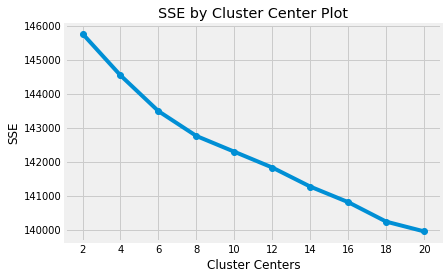

In [30]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf, 20)

## K-means

Apply the K-means algorithm and plot graphs showing the results

In [31]:
clusters = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=20).fit_predict(tfidf)

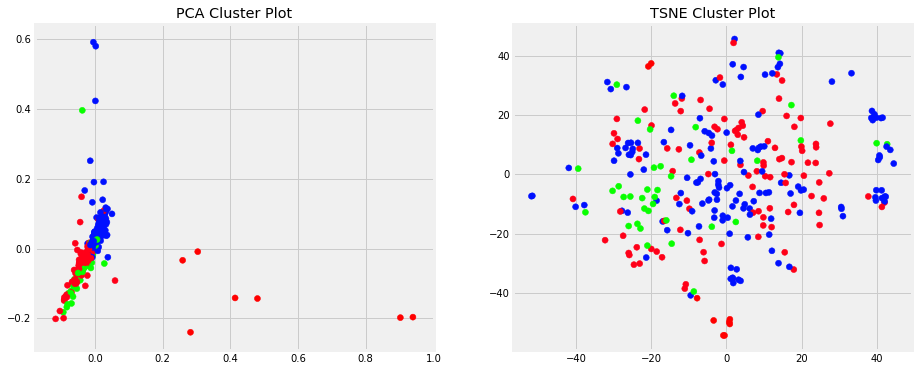

In [32]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf, clusters)

In [33]:
df['clusters'] = clusters

In [34]:
df[df.label == 'joy'].clusters.value_counts()

2    22593
3    12463
1     8689
0     1459
Name: clusters, dtype: int64

In [35]:
df[df.label == 'fear'].clusters.value_counts()

2    17836
3    11411
1     4200
Name: clusters, dtype: int64

In [36]:
df[df.label == 'anger'].clusters.value_counts()

2    16171
3    12986
1     4361
Name: clusters, dtype: int64

In [37]:
df[df.label == 'sadness'].clusters.value_counts()

2    15915
3    12792
1     5232
0     3429
Name: clusters, dtype: int64